### **Assignment_03**

### 1. Cutoff reviews after 150 words
###2. Restrict training samples to 100
###3. Validate on 10,000 samples
###4. Consider only the top 10,000 words
###5. Consider both a embedding layer, and a pretrained word embedding. Which approach did better?

In [1]:
# Importing
from keras.datasets import imdb
from keras import preprocessing
from keras.models import Sequential
from keras.utils import pad_sequences
from keras.layers import Flatten, Dense, Embedding

# Number of words to consider as features
max_features = 10000

# Loading the data and only keeping the top words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Cutoff reviews after 150 words
maxlen = 150
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Restricting training samples to 100
training_samples = 100
x_train = x_train[:training_samples]
y_train = y_train[:training_samples]

# Considering only the top 10,000 words
max_words = 10000



17464789/17464789 [==============================] - 0s 0us/step


###Defining the model

In [2]:
# Defining a model with an embedding layer and a dense layer
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 8)            80000     
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense (Dense)               (None, 32)                38432     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 118,465
Trainable params: 118,465
Non-trainable params: 0
_________________________________________________________________


###Training and evaluating the model

In [3]:
# Training the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_test[:10000], y_test[:10000]))

# Evaluating the model
test_loss, test_acc = model.evaluate(x_test[:10000], y_test[:10000])
print('Test accuracy:', test_acc)

Epoch 1/10
4/4 [==============================] - 2s 296ms/step - loss: 0.6982 - acc: 0.4100 - val_loss: 0.6933 - val_acc: 0.5018
Epoch 2/10
4/4 [==============================] - 1s 435ms/step - loss: 0.6669 - acc: 0.9100 - val_loss: 0.6930 - val_acc: 0.5087
Epoch 3/10
4/4 [==============================] - 1s 443ms/step - loss: 0.6456 - acc: 1.0000 - val_loss: 0.6928 - val_acc: 0.5120
Epoch 4/10
4/4 [==============================] - 1s 229ms/step - loss: 0.6232 - acc: 1.0000 - val_loss: 0.6931 - val_acc: 0.5057
Epoch 5/10
4/4 [==============================] - 1s 185ms/step - loss: 0.6004 - acc: 1.0000 - val_loss: 0.6929 - val_acc: 0.5116
Epoch 6/10
4/4 [==============================] - 1s 220ms/step - loss: 0.5732 - acc: 1.0000 - val_loss: 0.6928 - val_acc: 0.5131
Epoch 7/10
4/4 [==============================] - 0s 159ms/step - loss: 0.5421 - acc: 1.0000 - val_loss: 0.6931 - val_acc: 0.5152
Epoch 8/10
4/4 [==============================] - 1s 170ms/step - loss: 0.5061 - acc: 0.98

###Test accuracy: 0.513

### Plotting

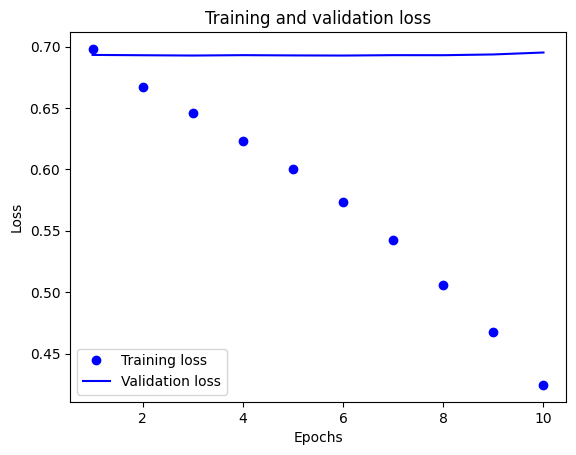

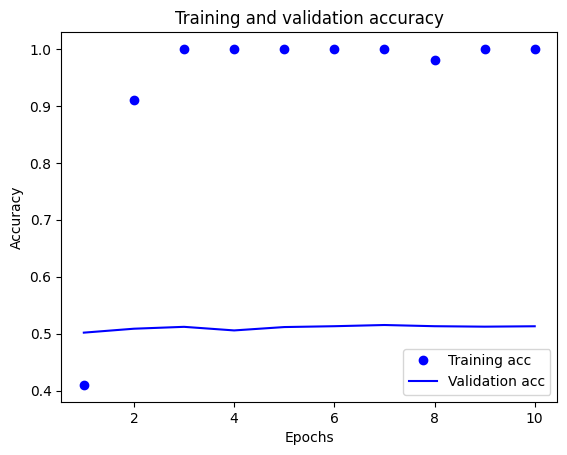

In [4]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc = history_dict["acc"]
val_acc = history_dict["val_acc"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Using Pre-trained model

In [5]:
import os
import numpy as np

# Path to the pre-trained embedding file
glove_dir = '/content/drive/MyDrive/AML/glove'

# Loading the pre-trained embedding
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))


Found 400000 word vectors.


In [6]:
# Preparing the embedding matrix
word_index = imdb.get_word_index()
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # Words not found in embedding index will be all zeros
            embedding_matrix[i] = embedding_vector



1641221/1641221 [==============================] - 0s 0us/step


###Defining a model with a pre-trained embedding layer and a dense layer

In [7]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten_1 (Flatten)         (None, 15000)             0         
                                                                 
 dense_2 (Dense)             (None, 32)                480032    
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,480,065
Trainable params: 1,480,065
Non-trainable params: 0
_________________________________________________________________


###Training and evaluating the model

In [8]:
# Seting the pre-trained weights for the embedding layer
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

# Compiling the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# Training the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_test[:10000], y_test[:10000]))

# Evaluating the model
test_loss, test_acc = model.evaluate(x_test[:10000], y_test[:10000])
print('Test accuracy:', test_acc)


Epoch 1/10
4/4 [==============================] - 2s 495ms/step - loss: 2.4194 - acc: 0.5200 - val_loss: 0.9553 - val_acc: 0.5026
Epoch 2/10
4/4 [==============================] - 1s 437ms/step - loss: 1.0782 - acc: 0.6400 - val_loss: 0.7341 - val_acc: 0.4971
Epoch 3/10
4/4 [==============================] - 1s 285ms/step - loss: 0.3775 - acc: 0.8400 - val_loss: 1.0649 - val_acc: 0.4973
Epoch 4/10
4/4 [==============================] - 1s 289ms/step - loss: 0.3632 - acc: 0.8100 - val_loss: 0.7963 - val_acc: 0.5124
Epoch 5/10
4/4 [==============================] - 1s 438ms/step - loss: 0.1081 - acc: 1.0000 - val_loss: 1.1429 - val_acc: 0.5044
Epoch 6/10
4/4 [==============================] - 1s 439ms/step - loss: 0.0628 - acc: 1.0000 - val_loss: 0.8558 - val_acc: 0.5160
Epoch 7/10
4/4 [==============================] - 3s 868ms/step - loss: 0.0340 - acc: 1.0000 - val_loss: 1.1440 - val_acc: 0.4984
Epoch 8/10
4/4 [==============================] - 3s 880ms/step - loss: 0.0673 - acc: 1.00

### Test accuracy: 0.516, so here we can see that the pre-trained word embedding model is performing better.

###Plotting

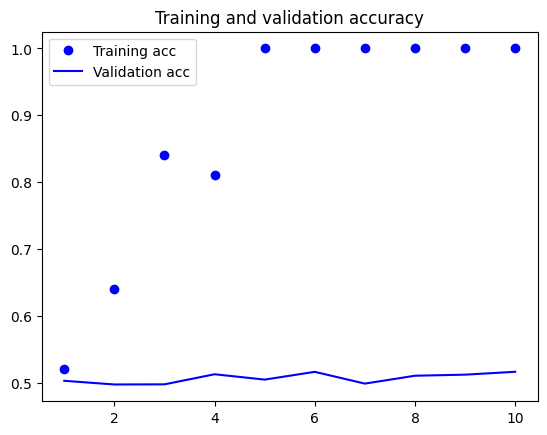

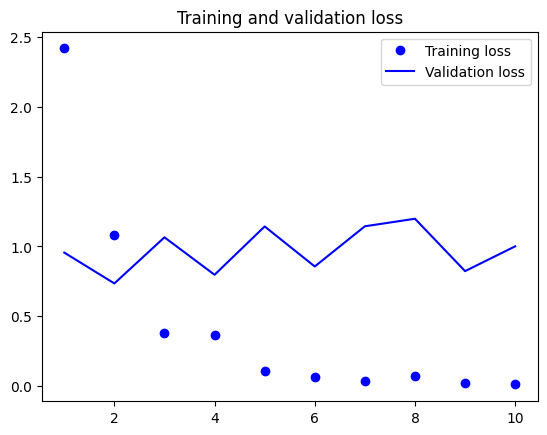

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Changing the number of training samples to 500

Epoch 1/10
4/4 [==============================] - 1s 456ms/step - loss: 0.0073 - acc: 1.0000 - val_loss: 0.8614 - val_acc: 0.5142
Epoch 2/10
4/4 [==============================] - 3s 885ms/step - loss: 0.0053 - acc: 1.0000 - val_loss: 0.9771 - val_acc: 0.5146
Epoch 3/10
4/4 [==============================] - 3s 879ms/step - loss: 0.0044 - acc: 1.0000 - val_loss: 1.0321 - val_acc: 0.5157
Epoch 4/10
4/4 [==============================] - 3s 898ms/step - loss: 0.0037 - acc: 1.0000 - val_loss: 1.0573 - val_acc: 0.5137
Epoch 5/10
4/4 [==============================] - 3s 886ms/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.9829 - val_acc: 0.5155
Epoch 6/10
4/4 [==============================] - 3s 886ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.9856 - val_acc: 0.5157
Epoch 7/10
4/4 [==============================] - 2s 540ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 1.0127 - val_acc: 0.5155
Epoch 8/10
4/4 [==============================] - 1s 297ms/step - loss: 0.0017 - acc: 1.00

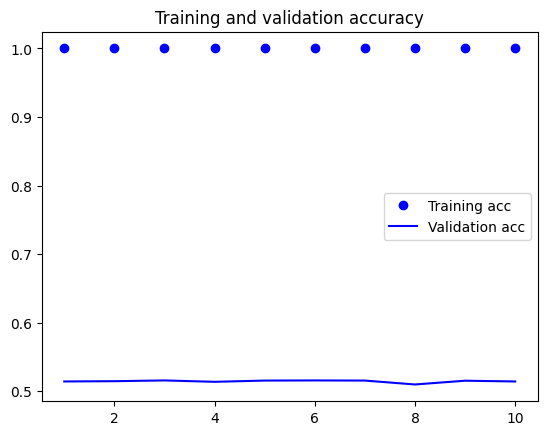

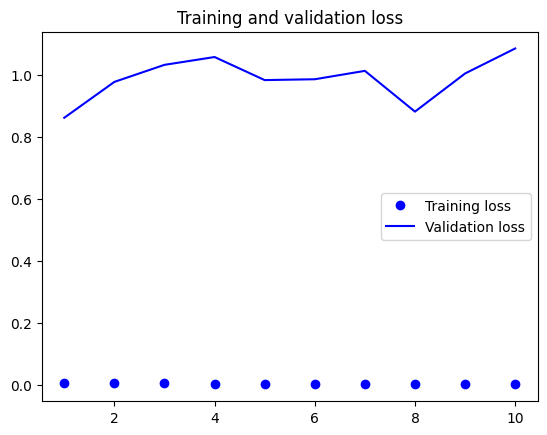

In [10]:

x_train1 = x_train[:500]
y_train1 = y_train[:500]
# Train the model
history = model.fit(x_train1, y_train1,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_test[:10000], y_test[:10000]))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test[:10000], y_test[:10000])
print('Test accuracy:', test_acc)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

###150 samples

Epoch 1/10
4/4 [==============================] - 3s 904ms/step - loss: 9.5409e-04 - acc: 1.0000 - val_loss: 1.1940 - val_acc: 0.5132
Epoch 2/10
4/4 [==============================] - 1s 437ms/step - loss: 8.5152e-04 - acc: 1.0000 - val_loss: 0.8985 - val_acc: 0.5104
Epoch 3/10
4/4 [==============================] - 1s 281ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.9412 - val_acc: 0.5150
Epoch 4/10
4/4 [==============================] - 1s 296ms/step - loss: 5.9794e-04 - acc: 1.0000 - val_loss: 1.2240 - val_acc: 0.5142
Epoch 5/10
4/4 [==============================] - 1s 297ms/step - loss: 5.3577e-04 - acc: 1.0000 - val_loss: 1.1440 - val_acc: 0.5148
Epoch 6/10
4/4 [==============================] - 1s 437ms/step - loss: 4.6391e-04 - acc: 1.0000 - val_loss: 1.0202 - val_acc: 0.5163
Epoch 7/10
4/4 [==============================] - 1s 441ms/step - loss: 3.9354e-04 - acc: 1.0000 - val_loss: 1.1551 - val_acc: 0.5170
Epoch 8/10
4/4 [==============================] - 1s 437ms/step - 

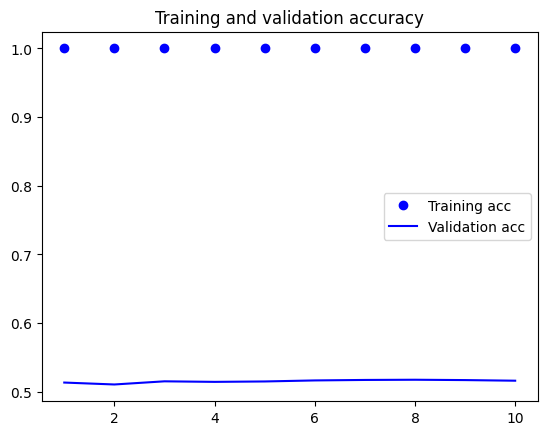

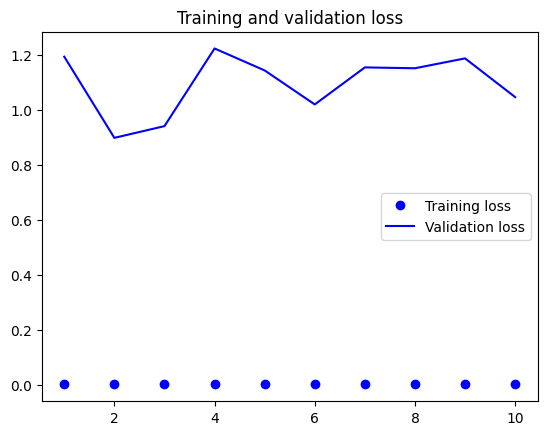

In [11]:
x_train2 = x_train[:150]
y_train2 = y_train[:150]
# Train the model
history = model.fit(x_train2, y_train2,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_test[:10000], y_test[:10000]))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test[:10000], y_test[:10000])
print('Test accuracy:', test_acc)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

###1000 samples

Epoch 1/10
4/4 [==============================] - 1s 467ms/step - loss: 1.0245e-04 - acc: 1.0000 - val_loss: 1.2498 - val_acc: 0.5173
Epoch 2/10
4/4 [==============================] - 1s 440ms/step - loss: 9.4588e-05 - acc: 1.0000 - val_loss: 1.2862 - val_acc: 0.5167
Epoch 3/10
4/4 [==============================] - 1s 439ms/step - loss: 8.6724e-05 - acc: 1.0000 - val_loss: 1.2124 - val_acc: 0.5156
Epoch 4/10
4/4 [==============================] - 3s 871ms/step - loss: 7.8658e-05 - acc: 1.0000 - val_loss: 1.2132 - val_acc: 0.5162
Epoch 5/10
4/4 [==============================] - 1s 437ms/step - loss: 7.2812e-05 - acc: 1.0000 - val_loss: 1.3061 - val_acc: 0.5166
Epoch 6/10
4/4 [==============================] - 1s 438ms/step - loss: 6.6284e-05 - acc: 1.0000 - val_loss: 1.3071 - val_acc: 0.5172
Epoch 7/10
4/4 [==============================] - 1s 437ms/step - loss: 6.1183e-05 - acc: 1.0000 - val_loss: 1.2798 - val_acc: 0.5165
Epoch 8/10
4/4 [==============================] - 1s 440ms/ste

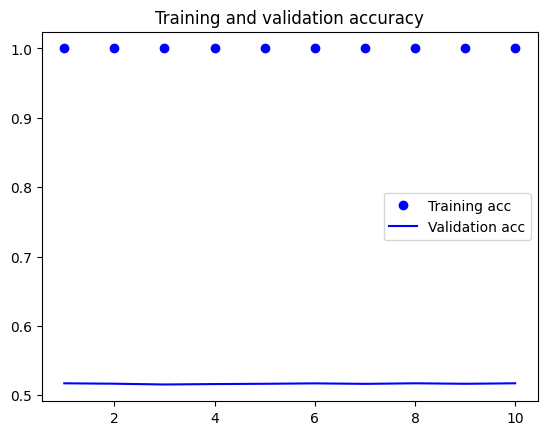

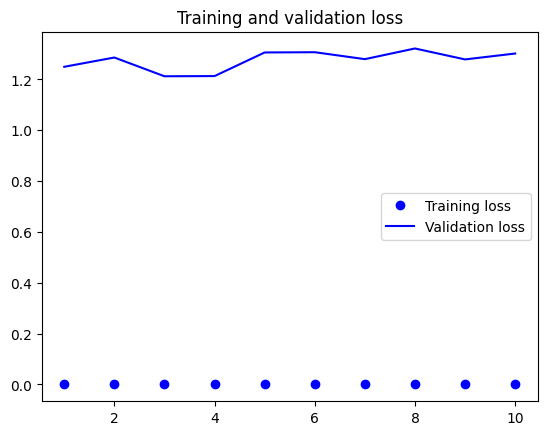

In [13]:
x_train1000 = x_train[:1000]
y_train1000 = y_train[:1000]
# Train the model
history = model.fit(x_train1000, y_train1000,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_test[:10000], y_test[:10000]))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test[:10000], y_test[:10000])
print('Test accuracy:', test_acc)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

##When we changed the number of training samples to 1000, the embedding layer outperformed the pre-trained word embedding layer model.